# King County Real Estate Project

### Table of Contents

Section_1

[section_2](#section_2)


[section_3](#section_3)

## Business Understanding

For this project, I have been retained by the leadership of a startup online real estate analytics firm, BCF, LLC ('BCF'). BCF has requested advice for one of its newest clients, a mid-sized well established local real estate broker from the King County region of Washington State, located on top of Queen Anne ('Client'). Client has a large crew of seasoned real estate agents, loan officers, lead generation experts, and other sales supply chain specialists.  Client is currently exploring ideas to scale its business in the King County region and keep pace with newer, more technologically advanced real estate brokers. 

Toward this end, Client wants to obtain better data insights for its team by leveraging the abundance of real estate data available.  Client has approached BCF for a scientific perpective on what drives residential real estate sales in King County so that it can provide actionable reference points for its relentless 'direct to consumer' sales team. Client is requesting a multivariate linear regression analysis of the King County real estate market, with `price` being the primary dependent variable.  

## Data and Methods

### Purpose

The goal for the analysis is an effort to obtain a better understanding of what combination of independent factors are most impactful for residential real estate prices in King County. 

### Primary Data Source

Based on survey responses and other direct input from Client's sales team, Client provided a list of variables most likely to be highly successful predictors for the `price` of residential homes in King County.  From that list, most  fields were populated from data available to the public on the [King County Assessor Data Download page](https://info.kingcounty.gov/assessor/DataDownload/default.aspx). A full index of the variables ('columns'), including the target variable `price`, are located [here](http://localhost:8888/edit/data/column_names.md).  The `address`, `lat`, and `long` fields were retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/).  ('Baseline Data').  

### Methodology

The guiding principal underlying this analysis was the establishment of an iterative update process, beginning with an initial baseline regression model, that would continuously provide the model with new information, while simultaneously maintaining all fundamental assumptions of linear regression. Initially, Baseline Data was preprocessed  and modeled ('Baseline Model').  This was followed by a lengthy data exploration process which involved visulizing the different relationships between the independent variables and the target variable.  During the exploration process, several new features were engineered from existing data while additional data was obtained from the  scaled and cleaned for outliers, and then remodeled against

### Geographic data retrieval 

Multiple websites were explored for sources of additional data, in keeping with the goal to provide diverse information that might be helpful for the model. Ultimately, the most important factor, other than the sheer square footage, was geographic location.  Several sources of geographic information were consulted, but ultimately, the best source of geographic knowledge was contained in the Zipcode information within the Baseline Data.  




In addition to the use of `Zipcode`, a dataset was taken from the [King County GIS Open Data Site](https://data.kingcounty.gov/County-Operations/King-County-GIS-Open-Data-site/wuuf-xywg) and includes a range of services, and location points were constructed based on the longitude and latitude of these locations. From there, we created distance measurements between the houses and those locations.  

The initial baseline regression model was built utilizing the base dataset. The second model iteration was built using the

-what each record represents
-which column is begin used as the regress

## Methodology

The guiding principal underlying this analysis was to establish an iterative update process, beginning with the initial baseline model, that would provide the model with new information, while simultaneously keeping all independence assumptions  to the model in an effort to obtain a better understanding of what combination of independent factors are most impacting residential real estate prices in King County.  In keeping with this goal, significant efforts to maintain independence were made - independence between each independent variable and independence between each independent variable and the target. 

## Data Preparation

### Loading the Data and Programming tools

In [1]:

#importing all appropriate Pythonic libraries and packages 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
import re
%matplotlib inline

In [2]:
# reading in the King County dataset to Pandas
df = pd.read_csv('data/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
# dropping the placeholder column
df.drop(labels='id', axis=1, inplace=True)

#### Date issues

In [5]:
# converting all dates to datetime
df['date'] = pd.to_datetime(df['date'])

# renaming date to selldate
rnmdate = {'date':'selldate'}
df.rename(columns=rnmdate, inplace=True)

#### Zipcode issues

In [6]:
# isolating the zip code 
# alternative methods to achieve same
# df['Zipcode'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
# df['address'][0].split(',')[2][-5:]
# df['address'][1000][-20:-15]

df['Zipcode'] = df['address'].apply(lambda x: x[-20:-15])

df['Zipcode'] = df['Zipcode'].astype(int)

# controling for outliers in zipcode preprocessing
df = df.loc[(df['Zipcode'].astype(int) > 98000) & (df['Zipcode'].astype(int) <= 98922)]

df.Zipcode.nunique()

88

<AxesSubplot:>

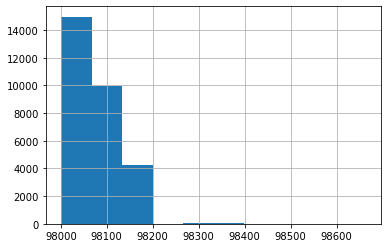

In [7]:
df['Zipcode'].hist()

In [224]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,Zipcode
count,2.924100e+04,29241.000000,29241.000000,29241.000000,2.924100e+04,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000
mean,1.112620e+06,3.435040,2.332239,2130.756643,1.719192e+04,1.517151,1825.820423,480.763654,336.275811,216.363599,1973.878458,93.764304,47.543109,-122.214209,98077.684826
std,8.953389e+05,0.978861,0.895780,977.344954,6.125879e+04,0.548585,880.729276,585.935636,286.199465,246.749571,31.684861,422.616958,0.147563,0.143653,55.267033
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.636797,-122.666021,98001.000000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.430065,-122.328290,98032.000000
50%,8.670000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,142.000000,1976.000000,0.000000,47.557680,-122.234070,98059.000000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.078000e+04,2.000000,2290.000000,960.000000,510.000000,310.000000,2001.000000,0.000000,47.672045,-122.127475,98117.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960,98663.000000


### Preprocessing

#### Engineering a Yr_Old Column

In [225]:
# creating a year old column
df['yr_old'] = np.where(df['yr_renovated'] !=0,df.selldate.apply(lambda x: x.year) - df['yr_renovated'],
                        df['selldate'].apply(lambda x: x.year) - df['yr_built'])

In [226]:
# controlling for dates where house was sold after renovation
df.loc[df['yr_old'] < 0, 'yr_old'] = 0

In [227]:
df.yr_old.value_counts()

0      1368
1       664
44      504
54      478
16      468
       ... 
89       32
87       31
119      30
88       30
120      27
Name: yr_old, Length: 123, dtype: int64

#### Data Cleaning

In [228]:
# remove missing values in columns
df.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)

In [229]:
# identifying missing values 
df.isna().sum()/df.shape[0]

selldate         0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
Zipcode          0.0
yr_old           0.0
dtype: float64

### Target distribution

First we will look at the `price` distribution. 

In [230]:
df.corr()['price']

price            1.000000
bedrooms         0.290994
bathrooms        0.488039
sqft_living      0.616741
sqft_lot         0.086790
floors           0.199285
sqft_above       0.546108
sqft_basement    0.246548
sqft_garage      0.267477
sqft_patio       0.317623
yr_built         0.105877
yr_renovated     0.085506
lat              0.296212
long             0.081940
Zipcode         -0.105275
yr_old          -0.137946
Name: price, dtype: float64

/Users/chuck/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

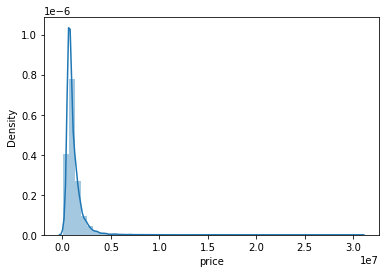

In [231]:
sns.distplot(df['price'])

Price is the singular dependent variable in our model.

## Modeling

In [232]:
# Creating categorical variables
cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'grade']]
cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'grade']]
cats2 = df[['selldate','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'grade', 'lat', 'long']]

### Baseline Model

In [233]:
pred_cols = [x for x in df.columns if x not in cats1]

In [234]:
pred_cols2 = [x for x in df.columns if x not in cats2]

In [235]:
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'yr_old']

In [236]:
# create baseline model
preds = df[pred_cols]
target = df['price']

In [237]:
y = target
X = preds
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [238]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1954.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:15:02   Log-Likelihood:            -4.3197e+05
No. Observations:               29200   AIC:                         8.640e+05
Df Residuals:                   29185   BIC:                         8.641e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.313e+07   4.25e+06    -21.912      0.000   -1.01e+08   -8.48e+07
bedrooms      -1.394e+05   5195.248    -26.833      0.000    -1.5e+05   -1.29e+05
bathrooms      1.179e+05   7701.917     15.305      0.000    1.03e+05    1.33e+05
sqft_living     327.7250     17.255     18.994      0.000     293.905     361.545
sqft_lot          0.1948      0.064      3.025      0.002       0.069       0.321
floors        -9.492e+04   9788.544     -9.697      0.000   -1.14e+05   -7.57e+04
sqft_above      295.6770     17.616     16.784      0.000     261.148     330.206
sqft_basement    82.4744     13.093      6.299      0.000      56.811     108.138
sqft_garage     -35.3134     18.315     -1.928      0.054     -71.211       0.584
sqft_patio      262.0396     17.058     15.362      0.000     228.606     295.474
yr_built       2725.5026    727.737      3.745      0.000    1299.104    4151.901
yr_renovated    203.0562     23.012      8.824      0.000     157.952     248.161
lat            1.535e+06   2.69e+04     57.063      0.000    1.48e+06    1.59e+06
long          -1.199e+05   3.11e+04     -3.859      0.000   -1.81e+05    -5.9e+04
yr_old         4842.8398    731.818      6.618      0.000    3408.443    6277.236
==============================================================================
Omnibus:                    45281.582   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         77556338.212
Skew:                           9.388   Prob(JB):                         0.00
Kurtosis:                     254.779   Cond. No.                     7.13e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [239]:
baseline_mae = mean_absolute_error(y, results.predict(sm.add_constant(X)))
baseline_mae

338894.08774805674

This baseline model is limited to both discrete and continuous numeric predictors.  Based on the Mean Absolute Error ('MAE'), overall this baseline model is off by about an average of $338,488.68 for any given prediction. This calculation is the mean absolute (regardless of whether it is positve or negative) distance of all errors.  The model is statistically significant and explains about 48 percent of the variance in `price`. 

The intercept is extremely negative, at minus 9 to the 7th power, which makes it very hard to interpret.  

- For each additional square foot of in `sqft_living`, the price increases by about $327. 

- For each additional square foot of in `sqft_above`, the price increases by about $295. 

- For each additional square foot of in `sqft_basement`, the price increases by about $82. 

These all seem reasonable, however, there are some really odd coefficients.  

- For each additional square foot of in `sqft_patio`, the price increases by about $262.

- For each additional square foot of in `sqft_lot`, the price increases by about $0.19. 

- For each additional square foot of in `sqft_basement`, the price **decreases** by about $35. 


These are all bizarre figures.   


At first glance, `sqft_living` is the most highly correlated feature in the baseline numeric model.    

Sqft_lot has a strange coeeficient.  One would think sqft_lot would be a major factor in the price.  

In [240]:
mean_squared_error(y, results.predict(sm.add_constant(X)), squared=False)

643350.81253465

In [241]:
# df.select_dtypes('number')

### Scaling

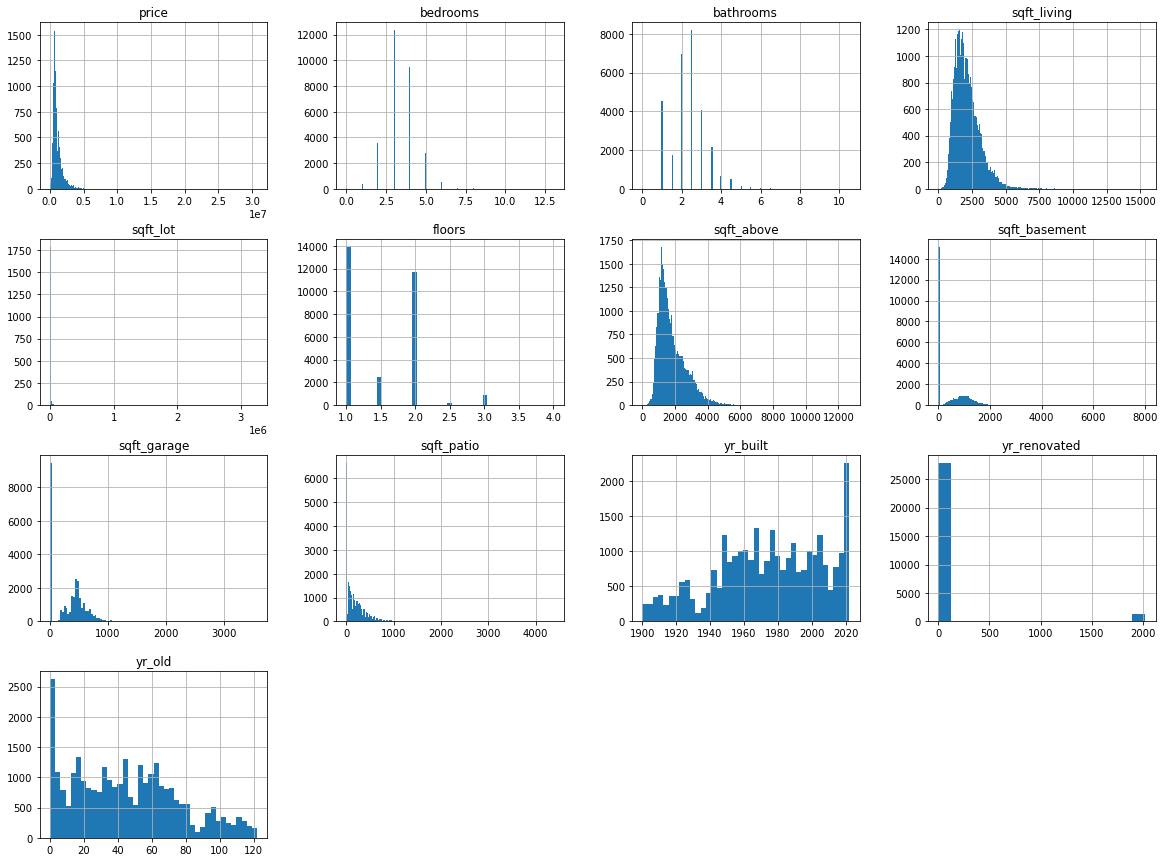

In [123]:
df[pred_cols2].hist(figsize=(20,15), bins="auto");

The distribution in price seems to be exponential and heavily right skewed.  A log transformation seems reasonable in order to alleviate the impact of both the outliers and their residuals on our interpretation.  

`sqft_lot` and `price` are on entirely different scales from our other variables.  Lets get a better picture as to what we are seeing by scaling the data.  

In [242]:
scaler = StandardScaler()

In [243]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [244]:
model_scaled = sm.OLS(y.values, sm.add_constant(X_scaled)).fit()
model_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1954.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:17:20   Log-Likelihood:            -4.3197e+05
No. Observations:               29200   AIC:                         8.640e+05
Df Residuals:                   29185   BIC:                         8.641e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.113e+06   3765.893    295.550      0.000    1.11e+06    1.12e+06
bedrooms      -1.362e+05   5075.272    -26.833      0.000   -1.46e+05   -1.26e+05
bathrooms      1.054e+05   6889.177     15.305      0.000    9.19e+04    1.19e+05
sqft_living    3.201e+05   1.69e+04     18.994      0.000    2.87e+05    3.53e+05
sqft_lot       1.184e+04   3914.830      3.025      0.002    4169.953    1.95e+04
floors        -5.208e+04   5370.763     -9.697      0.000   -6.26e+04   -4.16e+04
sqft_above     2.602e+05   1.55e+04     16.784      0.000     2.3e+05    2.91e+05
sqft_basement  4.834e+04   7673.807      6.299      0.000    3.33e+04    6.34e+04
sqft_garage    -1.01e+04   5240.719     -1.928      0.054   -2.04e+04     167.180
sqft_patio     6.466e+04   4208.843     15.362      0.000    5.64e+04    7.29e+04
yr_built       8.632e+04    2.3e+04      3.745      0.000    4.11e+04    1.31e+05
yr_renovated   8.575e+04   9718.404      8.824      0.000    6.67e+04    1.05e+05
lat            2.265e+05   3969.061     57.063      0.000    2.19e+05    2.34e+05
long          -1.716e+04   4446.417     -3.859      0.000   -2.59e+04   -8442.127
yr_old         1.501e+05   2.27e+04      6.618      0.000    1.06e+05    1.95e+05
==============================================================================
Omnibus:                    45281.582   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         77556338.212
Skew:                           9.388   Prob(JB):                         0.00
Kurtosis:                     254.779   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# section_2

## Adding geographic categorical features

In [140]:
# reading in the King County dataset to Pandas
df_dem = pd.read_csv('data/Points_of_Interest.csv')
df_dem

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE
0,-122.067101,47.465386,1,10000032,5733.0,66,Station 79,79,20505 SE 152nd St,98059.0
1,-122.313910,47.552302,2,905,490884.0,664,Cleveland STEM High School,Cleveland,5511 15th Ave S,98108.0
2,-122.195782,47.657500,3,6600168,35858.0,663,Northwest University,NW University,5520 108th Ave NE,98033.0
3,-122.264083,47.319432,4,7,33.0,660,Evergreen Heights Elementary School,Evergreen Heights,5602 S 316th St,98001.0
4,-122.261359,47.333845,5,6600283,692199.0,660,Meredith Hill Elementary School,Hill,5830 S 300th St,98001.0
...,...,...,...,...,...,...,...,...,...,...
5632,-122.234595,47.381758,5633,10001602,898062.0,695,Public Halal Market,Public Halal Market,225 W MEEKER ST,98032.0
5633,-122.296801,47.415187,5634,10001603,391412.0,695,SeaTac International Market& Deli,SeaTac International Market& Deli,20804 INTERNATIONAL BLVD,98198.0
5634,-122.297787,47.407385,5635,10001604,758056.0,695,Madina Halal Market,Madina Halal Market,21630 PACIFIC HWY S,98198.0
5635,-122.177136,47.706192,5636,10001605,36305.0,695,Sahand,Sahand,12047 124TH AVE NE,98034.0


In [141]:
df_dem['CODE'].nunique()

50

In [142]:
df_dem.drop(labels=['OBJECTID','FEATURE_ID', 'ESITE', 'ABB_NAME', 'ADDRESS'], axis=1, inplace=True)

In [143]:
import geopy.distance

In [144]:
df_dem.CODE.value_counts(normalize = True)

600    0.259713
800    0.188398
695    0.073443
660    0.053929
60     0.029448
66     0.028739
330    0.022530
664    0.021111
530    0.020933
570    0.020401
902    0.017563
64     0.017208
360    0.015256
661    0.014724
390    0.014369
690    0.014015
901    0.013482
662    0.012418
510    0.011886
65     0.011354
120    0.011176
630    0.008870
580    0.008870
90     0.008160
903    0.007273
300    0.006564
63     0.006564
180    0.006564
904    0.006209
420    0.005854
62     0.005677
665    0.005499
663    0.005322
240    0.004967
480    0.004790
30     0.004790
67     0.004612
150    0.003725
999    0.003193
666    0.003016
61     0.002838
210    0.002484
500    0.002484
340    0.002306
68     0.002129
720    0.001951
520    0.001064
581    0.001064
450    0.000887
270    0.000177
Name: CODE, dtype: float64

In [145]:
rename_zip = {'ZIPCODE':'Zipcode'}
df_dem.rename(columns=rename_zip, inplace=True)

In [146]:
rename_long = {'X': 'long'}
rename_lat = {'Y': 'lat'}


In [147]:
df_dem.rename(columns=rename_long, inplace=True)
df_dem.rename(columns=rename_lat, inplace=True)

In [148]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5637 entries, 0 to 5636
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   long     5637 non-null   float64
 1   lat      5637 non-null   float64
 2   CODE     5637 non-null   int64  
 3   NAME     5637 non-null   object 
 4   Zipcode  5625 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 220.3+ KB


In [149]:
df_dem.isna().sum()/df_dem.shape[0]

long       0.000000
lat        0.000000
CODE       0.000000
NAME       0.000000
Zipcode    0.002129
dtype: float64

In [150]:
df_dem.dropna(subset=['Zipcode'], axis=0, inplace=True)

In [151]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 0 to 5636
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   long     5625 non-null   float64
 1   lat      5625 non-null   float64
 2   CODE     5625 non-null   int64  
 3   NAME     5625 non-null   object 
 4   Zipcode  5625 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 263.7+ KB


In [152]:
df.long

0       -122.19052
1       -122.35591
2       -122.22520
3       -122.29020
4       -122.07188
           ...    
30150   -122.32940
30151   -122.38851
30152   -122.29585
30153   -122.18908
30154   -122.32634
Name: long, Length: 29200, dtype: float64

In [153]:
df.lat

0        47.461975
1        47.711525
2        47.502045
3        47.566110
4        47.532470
           ...    
30150    47.664740
30151    47.565610
30152    47.610395
30153    47.449490
30154    47.435840
Name: lat, Length: 29200, dtype: float64

In [154]:
house_coord = np.array(list(zip(df.lat, df.long)))

In [155]:
# df.info()

### Distances of homes to the Nearest Hospital

In [156]:
business = df_dem.loc[df_dem['CODE'] == 420]

In [157]:
df_loc = list(zip(business.lat, business.long))

closest = []

for houseloc in house_coord:
    sortlist = []
    for hosploc in df_loc:
        sortlist.append(geopy.distance.great_circle(houseloc, hosploc).miles)
    closest.append(min(sortlist))

df['business_center'] = closest

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   selldate         29200 non-null  datetime64[ns]
 1   price            29200 non-null  float64       
 2   bedrooms         29200 non-null  int64         
 3   bathrooms        29200 non-null  float64       
 4   sqft_living      29200 non-null  int64         
 5   sqft_lot         29200 non-null  int64         
 6   floors           29200 non-null  float64       
 7   waterfront       29200 non-null  object        
 8   greenbelt        29200 non-null  object        
 9   nuisance         29200 non-null  object        
 10  view             29200 non-null  object        
 11  condition        29200 non-null  object        
 12  grade            29200 non-null  object        
 13  heat_source      29200 non-null  object        
 14  sewer_system     29200 non-null  objec

#### distance to transit centers

In [159]:
clinic = df_dem.loc[df_dem['CODE'] == 340]

In [160]:
df_loc = list(zip(clinic.lat, clinic.long))

closest = []

for houseloc in house_coord:
    sortlist = []
    for loc in df_loc:
        sortlist.append(geopy.distance.great_circle(houseloc, loc).miles)
    closest.append(min(sortlist))

df['clinic'] = closest

### Distance to elementary schools

In [161]:
elementary_schools = df_dem.loc[df_dem['CODE'] == 660]

In [162]:
df_loc = list(zip(elementary_schools.lat, elementary_schools.long))

closest = []

for houseloc in house_coord:
    sortlist = []
    for loc in df_loc:
        sortlist.append(geopy.distance.great_circle(houseloc, loc).miles)
    closest.append(min(sortlist))

df['closest_elem_schools'] = closest

Iterations were made using a `city` and `neighborhood` geographic categorical feature.  These were both found significantly correlated with `Zipcode`.  

[section_1](#section_1)
[section_3](#section_3)   

In [163]:
# df = df.merge(df_zip, how='left', on='Zipcode')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   selldate              29200 non-null  datetime64[ns]
 1   price                 29200 non-null  float64       
 2   bedrooms              29200 non-null  int64         
 3   bathrooms             29200 non-null  float64       
 4   sqft_living           29200 non-null  int64         
 5   sqft_lot              29200 non-null  int64         
 6   floors                29200 non-null  float64       
 7   waterfront            29200 non-null  object        
 8   greenbelt             29200 non-null  object        
 9   nuisance              29200 non-null  object        
 10  view                  29200 non-null  object        
 11  condition             29200 non-null  object        
 12  grade                 29200 non-null  object        
 13  heat_source     

In [165]:
# identify missing data in new dataset
df.isna().sum()/df.shape[0]
# df.dropna(subset=['Population', 'Neighborhood'], axis=0, inplace=True)

selldate                0.0
price                   0.0
bedrooms                0.0
bathrooms               0.0
sqft_living             0.0
sqft_lot                0.0
floors                  0.0
waterfront              0.0
greenbelt               0.0
nuisance                0.0
view                    0.0
condition               0.0
grade                   0.0
heat_source             0.0
sewer_system            0.0
sqft_above              0.0
sqft_basement           0.0
sqft_garage             0.0
sqft_patio              0.0
yr_built                0.0
yr_renovated            0.0
address                 0.0
lat                     0.0
long                    0.0
Zipcode                 0.0
yr_old                  0.0
business_center         0.0
clinic                  0.0
closest_elem_schools    0.0
dtype: float64

In [166]:
# df.dropna(subset=['Population', 'Neighborhood'], axis=0, inplace=True)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   selldate              29200 non-null  datetime64[ns]
 1   price                 29200 non-null  float64       
 2   bedrooms              29200 non-null  int64         
 3   bathrooms             29200 non-null  float64       
 4   sqft_living           29200 non-null  int64         
 5   sqft_lot              29200 non-null  int64         
 6   floors                29200 non-null  float64       
 7   waterfront            29200 non-null  object        
 8   greenbelt             29200 non-null  object        
 9   nuisance              29200 non-null  object        
 10  view                  29200 non-null  object        
 11  condition             29200 non-null  object        
 12  grade                 29200 non-null  object        
 13  heat_source     

In [168]:
# no NA/missing values in merged dataset
df.isna().sum()/df.shape[0]

selldate                0.0
price                   0.0
bedrooms                0.0
bathrooms               0.0
sqft_living             0.0
sqft_lot                0.0
floors                  0.0
waterfront              0.0
greenbelt               0.0
nuisance                0.0
view                    0.0
condition               0.0
grade                   0.0
heat_source             0.0
sewer_system            0.0
sqft_above              0.0
sqft_basement           0.0
sqft_garage             0.0
sqft_patio              0.0
yr_built                0.0
yr_renovated            0.0
address                 0.0
lat                     0.0
long                    0.0
Zipcode                 0.0
yr_old                  0.0
business_center         0.0
clinic                  0.0
closest_elem_schools    0.0
dtype: float64

## Protected

The code below was a failed attempt to establish a protected/unprotected feature that would include only homes contained in a greenbelt that likely had some watershed/wildlife/environmental nuisance protection.  It was not correlated with price, nor large enough to be a predictor.  

In [169]:
# df1.loc[(df1['nuisance'] == 'YES') & (df1['greenbelt'] == 'YES'), 'protected'] = 'protected'
# df1.loc[(df1['nuisance'] != 'YES') | (df1['greenbelt'] != 'YES'), 'protected'] = 'unprotected'

In [73]:
# df1['protected']

In [74]:
# df1['protected'].value_counts() 

## Improving upon the baseline

## Standard Scaling

HomeSales 
standard scaling allows you to find coefficients. 
Be sure to include metric - r squared - to describe overall model performance.  
collineriety 
log scalling
remove outliers.  
Increase r squared. 


1. run model
2. see improvements, clean/feature engineer.  
3. see coefficients becoming more accurate.


## Grade - a failed attempt at making an Ordinal category numeric

In [75]:
# df1.grade.value_counts()

In [76]:
# df1.grade.value_counts()

In [101]:
# # grade_map = {
#     "7 Average": 7,
#     "8 Good": 8,
#     "9 Better": 9,
#     "6 Low Average": 6,
#     "5 Fair": 5,
#     "4 Low": 4,
#     "3 Poor": 3,
#     "2 Substandard": 2,
#     "10 Very Good": 10,
#     "11 Excellent": 11,
#     "13 Mansion": 13,
#     "12 Luxury": 12,
# }

In [102]:
# df1.grade = df1.grade.map(grade_map)

In [103]:
# making results more model friendly 
# dum_df1.loc[dum_df1['grade'] == '2 Substandard', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '3 Poor', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '4 Low', 'grade'] = 1

# dum_df1.loc[dum_df1['grade'] == '5 Fair', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '6 Low Average', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '7 Average', 'grade'] = 2

# dum_df1.loc[dum_df1['grade'] == '8 Good', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '9 Better', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '10 Very Good', 'grade'] = 3

# dum_df1.loc[dum_df1['grade'] == '11 Excellent', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '12 Luxury', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '13 Mansion', 'grade'] = 4

The above code, which was not used, was a brief lesson in why you do not want to force ordinal categories into continuous numeric variables, unless the values are in fact multiples of each other.    

## Lesson

scatter plot: visualize relationship  

box plot: gives you quantile info

histograms: distribution of frequencies 

qq plot residuals (outside of range) is 

In [104]:
# plt.boxplot(df1.price)

(array([2.8412e+04, 6.7600e+02, 7.9000e+01, 1.7000e+01, 1.0000e+01,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.7360000e+04, 3.0996240e+06, 6.1718880e+06, 9.2441520e+06,
        1.2316416e+07, 1.5388680e+07, 1.8460944e+07, 2.1533208e+07,
        2.4605472e+07, 2.7677736e+07, 3.0750000e+07]),
 <BarContainer object of 10 artists>)

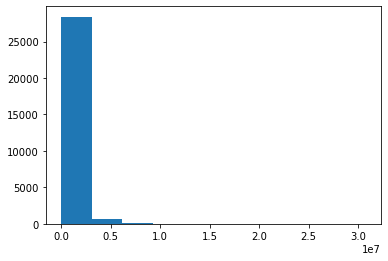

In [105]:
plt.hist(df['price'])

In [77]:
upper_limit = df['price'].mean() + 3*df['price'].std()
lower_limit = df['price'].mean() - 3*df['price'].std()
df['price'] = np.where(df['price'] > upper_limit, upper_limit,
np.where(df['price'] < lower_limit, lower_limit, df['price']))

In [78]:
# sns.heatmap(X.corr())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   selldate              29200 non-null  datetime64[ns]
 1   price                 29200 non-null  float64       
 2   bedrooms              29200 non-null  int64         
 3   bathrooms             29200 non-null  float64       
 4   sqft_living           29200 non-null  int64         
 5   sqft_lot              29200 non-null  int64         
 6   floors                29200 non-null  float64       
 7   waterfront            29200 non-null  object        
 8   greenbelt             29200 non-null  object        
 9   nuisance              29200 non-null  object        
 10  view                  29200 non-null  object        
 11  condition             29200 non-null  object        
 12  grade                 29200 non-null  object        
 13  heat_source     

## Discrete numeric predictors 

In [79]:
upper_limit = df['yr_old'].mean() + 3*df['yr_old'].std()
lower_limit = df['yr_old'].mean() - 3*df['yr_old'].std()
df['yr_old'] = np.where(df['yr_old'] > upper_limit, upper_limit,
np.where(df['yr_old'] < lower_limit, lower_limit, df['yr_old']))

In [80]:
# upper_limit = df['floors'].mean() + 3*df['floors'].std()
# lower_limit = df['floors'].mean() - 3*df['floors'].std()
# df['floors'] = np.where(df['floors'] > upper_limit, upper_limit,
# np.where(df['floors'] < lower_limit, lower_limit, df['floors']))

In [81]:
upper_limit = df['sqft_garage'].mean() + 3*df['sqft_garage'].std()
lower_limit = df['sqft_garage'].mean() - 3*df['sqft_garage'].std()

df['sqft_garage'] = np.where(df['sqft_garage'] > upper_limit, upper_limit,
    np.where(df['sqft_garage'] < lower_limit, lower_limit, df['sqft_garage']))

In [82]:
upper_limit = df['sqft_basement'].mean() + 3*df['sqft_basement'].std()
lower_limit = df['sqft_basement'].mean() - 3*df['sqft_basement'].std()

df['sqft_basement'] = np.where(df['sqft_basement'] > upper_limit, upper_limit,
    np.where(df['sqft_basement'] < lower_limit, lower_limit, df['sqft_basement']))

In [83]:
upper_limit = df['sqft_patio'].mean() + 3*df['sqft_patio'].std()
lower_limit = df['sqft_patio'].mean() - 3*df['sqft_patio'].std()

df['sqft_patio'] = np.where(df['sqft_patio'] > upper_limit, upper_limit,
    np.where(df['sqft_patio'] < lower_limit, lower_limit, df['sqft_patio']))

In [84]:
upper_limit = df['bedrooms'].mean() + 3*df['bedrooms'].std()
lower_limit = df['bedrooms'].mean() - 3*df['bedrooms'].std()
df['bedrooms'] = np.where(df['bedrooms'] > upper_limit, upper_limit,
np.where(df['bedrooms'] < lower_limit, lower_limit, df['bedrooms']))

In [85]:
upper_limit = df['bathrooms'].mean() + 3*df['bathrooms'].std()
lower_limit = df['bathrooms'].mean() - 3*df['bathrooms'].std()

df['bathrooms'] = np.where(df['bathrooms'] > upper_limit, upper_limit,
    np.where(df['bathrooms'] < lower_limit, lower_limit, df['bathrooms']))

In [86]:
upper_limit = df['sqft_above'].mean() + 3*df['sqft_above'].std()
lower_limit = df['sqft_above'].mean() - 3*df['sqft_above'].std()

df['sqft_above'] = np.where(df['sqft_above'] > upper_limit, upper_limit,
    np.where(df['sqft_above'] < lower_limit, lower_limit, df['sqft_above']))

In [87]:
upper_limit = df['sqft_lot'].mean() + 3*df['sqft_lot'].std()
lower_limit = df['sqft_lot'].mean() - 3*df['sqft_lot'].std()

df['sqft_lot'] = np.where(df['sqft_lot'] > upper_limit, upper_limit,
    np.where(df['sqft_lot'] < lower_limit, lower_limit, df['sqft_lot']))

In [88]:

# model_1 = sm.OLS(y, sm.add_constant(X1))
# results1 = model_1.fit()
# results1.summary()

### Model Iteration

### Utilizing categorical variables

In [93]:
cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'Zipcode', 'grade']]
cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 
            'address', 'Zipcode', 'grade']]

In [94]:
cat_cols = cats.columns
dum_df = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)

In [95]:
X1=dum_df.drop(labels=['selldate', 'price', 'address', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                       'grade_2 Substandard', 'heat_source_Electricity/Solar', 'lat', 'long'], axis=1)

In [96]:
X1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,4.0,1.0,1180,7140.0,1.0,1180.0,0.0,0.0,40.0,1969,...,0,0,0,0,0,0,0,1,0,0
1,5.0,2.5,2770,6703.0,1.0,1570.0,1570.0,0.0,240.0,1950,...,0,0,0,0,0,0,0,1,0,0
2,6.0,2.0,2880,6156.0,1.0,1580.0,1580.0,0.0,0.0,1956,...,0,0,0,0,0,0,0,1,0,0
3,3.0,3.0,2160,1400.0,2.0,1090.0,1070.0,200.0,270.0,2010,...,0,0,0,0,0,0,0,0,0,1
4,2.0,2.0,1120,758.0,2.0,1120.0,550.0,550.0,30.0,2012,...,0,0,0,0,0,0,0,1,0,0


In [97]:
X1=dum_df.drop(labels=['selldate', 'price', 'address', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                       'grade_2 Substandard', 'heat_source_Electricity/Solar', 'lat', 'long'], axis=1)
y=dum_df.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     786.8
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:54:36   Log-Likelihood:            -4.1193e+05
No. Observations:               29200   AIC:                         8.241e+05
Df Residuals:                   29072   BIC:                         8.252e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.106e+06   7.52e+05      1.472      0.141   -3.67e+05    2.58e+06
bedrooms                        -2791.1888   2891.689     -0.965      0.334   -8459.030    2876.652
bathrooms                        3.932e+04   4069.018      9.663      0.000    3.13e+04    4.73e+04
sqft_living                       102.9338      7.839     13.132      0.000      87.570     118.298
sqft_lot                            1.5819      0.087     18.239      0.000       1.412       1.752
floors                          -6.507e+04   5563.549    -11.697      0.000    -7.6e+04   -5.42e+04
sqft_above                        181.9318      8.547     21.287      0.000     165.180     198.684
sqft_basement                      32.7385      6.497      5.039      0.000      20.004      45.473
sqft_garage                        19.3589     10.239      1.891      0.059      -0.710      39.428
sqft_patio                         28.7556      9.916      2.900      0.004       9.320      48.191
yr_built                         -300.4944    371.903     -0.808      0.419   -1029.441     428.453
yr_renovated                       46.3212     11.747      3.943      0.000      23.296      69.347
yr_old                           -192.1435    374.307     -0.513      0.608    -925.802     541.515
business_center                 -1.729e+04   2386.499     -7.246      0.000    -2.2e+04   -1.26e+04
clinic                           9498.6951   2280.446      4.165      0.000    5028.917     1.4e+04
closest_elem_schools            -2.151e+04   5182.660     -4.150      0.000   -3.17e+04   -1.13e+04
waterfront_YES                   2.912e+05   1.78e+04     16.408      0.000    2.56e+05    3.26e+05
greenbelt_YES                     4.72e+04   1.25e+04      3.788      0.000    2.28e+04    7.16e+04
nuisance_YES                    -4.679e+04   5247.361     -8.917      0.000   -5.71e+04   -3.65e+04
view_EXCELLENT                   4.231e+05   1.79e+04     23.645      0.000    3.88e+05    4.58e+05
view_FAIR                        7.955e+04   2.35e+04      3.379      0.001    3.34e+04    1.26e+05
view_GOOD                        9.993e+04   1.34e+04      7.433      0.000    7.36e+04    1.26e+05
view_NONE                       -1.008e+05   8185.863    -12.308      0.000   -1.17e+05   -8.47e+04
condition_Fair                  -9.336e+04   2.22e+04     -4.203      0.000   -1.37e+05   -4.98e+04
condition_Good                   5.528e+04   4906.485     11.266      0.000    4.57e+04    6.49e+04
condition_Poor                  -7.145e+04   4.31e+04     -1.659      0.097   -1.56e+05     1.3e+04
condition_Very Good              1.165e+05   6865.576     16.965      0.000    1.03e+05     1.3e+05
heat_source_Gas                  1.279e+04   4677.073      2.735      0.006    3625

In [ ]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

Well, we have a much higher R-squared number after incorporating the dummified categorical predictors, as this model claims to explain 64 percent of the variance in `price`.   The constant is no longer statistically significant, so we need to adjust our figures to more accurately account for why that is happening.  We should next remove columns that are statistically significant.  

In [ ]:
def backward_regression(X1, y,
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):
    included=list(X1.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X1[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(worst_feature, worst_pval)
        if not changed:
            break
    return included

(backward_regression(X1, y))

In [ ]:
included = ['bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'business_center',
 'clinic',
 'closest_elem_schools',
 'waterfront_YES',
 'greenbelt_YES',
 'nuisance_YES',
 'view_EXCELLENT',
 'view_FAIR',
 'view_GOOD',
 'view_NONE',
 'condition_Fair',
 'condition_Good',
 'condition_Very Good',
 'heat_source_Gas',
 'heat_source_Gas/Solar',
 'sewer_system_PRIVATE RESTRICTED',
 'sewer_system_PUBLIC',
 'Zipcode_98002',
 'Zipcode_98004',
 'Zipcode_98005',
 'Zipcode_98006',
 'Zipcode_98007',
 'Zipcode_98008',
 'Zipcode_98010',
 'Zipcode_98011',
 'Zipcode_98014',
 'Zipcode_98019',
 'Zipcode_98023',
 'Zipcode_98024',
 'Zipcode_98027',
 'Zipcode_98028',
 'Zipcode_98029',
 'Zipcode_98030',
 'Zipcode_98031',
 'Zipcode_98033',
 'Zipcode_98034',
 'Zipcode_98038',
 'Zipcode_98039',
 'Zipcode_98040',
 'Zipcode_98042',
 'Zipcode_98045',
 'Zipcode_98051',
 'Zipcode_98052',
 'Zipcode_98053',
 'Zipcode_98056',
 'Zipcode_98058',
 'Zipcode_98059',
 'Zipcode_98065',
 'Zipcode_98072',
 'Zipcode_98074',
 'Zipcode_98075',
 'Zipcode_98077',
 'Zipcode_98102',
 'Zipcode_98103',
 'Zipcode_98105',
 'Zipcode_98106',
 'Zipcode_98107',
 'Zipcode_98108',
 'Zipcode_98109',
 'Zipcode_98112',
 'Zipcode_98115',
 'Zipcode_98116',
 'Zipcode_98117',
 'Zipcode_98118',
 'Zipcode_98119',
 'Zipcode_98122',
 'Zipcode_98125',
 'Zipcode_98126',
 'Zipcode_98133',
 'Zipcode_98136',
 'Zipcode_98144',
 'Zipcode_98146',
 'Zipcode_98155',
 'Zipcode_98166',
 'Zipcode_98177',
 'Zipcode_98199',
 'Zipcode_98223',
 'Zipcode_98251',
 'Zipcode_98270',
 'Zipcode_98288',
 'Zipcode_98338',
 'Zipcode_98372',
 'Zipcode_98387',
 'Zipcode_98663',
 'grade_11 Excellent',
 'grade_12 Luxury',
 'grade_13 Mansion',
 'grade_3 Poor',
 'grade_4 Low',
 'grade_5 Fair',
 'grade_6 Low Average',
 'grade_7 Average',
 'grade_8 Good',
 'grade_9 Better']

In [ ]:
Out = [x for x in X1.columns if x not in included]
Out

In [ ]:

cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'grade', 'Zipcode']]
cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'grade']]

In [ ]:
cat_cols = cats.columns
dum_df1 = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)

In [ ]:
# # running our model with dummified predictors
X1=X1.drop(labels=Out, axis=1)
y=df.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

In [ ]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

In [ ]:
# scaler = StandardScaler()

# X_scaled = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
# X_scaled.head()

# model_scaled = sm.OLS(y.values, sm.add_constant(X_scaled)).fit()
# model_scaled.summary()

# # X = sm.add_constant(X.values)
# # result = sm.OLS(Y.values, X).fit()

In [ ]:
# X_log.

## Addressing Multicolinerity

In [ ]:
X1.corr()

In [ ]:
abs(X1.corr()) > .75

In [ ]:
X2 = X1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
X2['pairs'] = list(zip(X2.level_0, X2.level_1))
X2.set_index(['pairs'], inplace=True)
X2.drop(columns=['level_1', 'level_0'], inplace = True)
X2.columns = ['cc']
X2.drop_duplicates(inplace=True)
X2[(X2.cc>.75) & (X2.cc<1)]

In [ ]:
# X1.drop(columns=['sqf'], inplace=True)

In [ ]:
model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

In [ ]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

In [ ]:
y_

## Categorical Variables

## Log Transformation of Lot Area and Price

With price and log seemingly skewed heavily to the right and having exponential curvature on the rise side, it may be easier to see the relationship if we log both variables.  

In [206]:
x_sqft_log = X.copy()
x_sqft_log['log(sqft_lot)'] = np.log(x_sqft_log['sqft_lot'])
x_sqft_log[['sqft_lot', 'log(sqft_lot)']]

,sqft_lot,log(sqft_lot)
0,7140,8.873468
1,6703,8.810310
2,6156,8.725182
3,1400,7.244228
4,758,6.630683
...,...,...
30150,4000,8.294050
30151,5800,8.665613
30152,3600,8.188689
30153,2889,7.968666


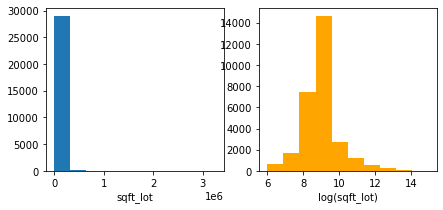

In [128]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(x_sqft_log['sqft_lot'])
ax1.set_xlabel("sqft_lot")
ax2.hist(x_sqft_log['log(sqft_lot)'], color = 'orange')
ax2.set_xlabel("log(sqft_lot)");

In [208]:
x_sqft_log.drop('sqft_lot', axis=1, inplace=True)
x_sqft_log

KeyError: "['sqft_lot'] not found in axis"

In [209]:
sqft_log_model = sm.OLS(y, sm.add_constant(x_sqft_log))
sqft_log_results = sqft_log_model.fit()

print(sqft_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1955.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:33:31   Log-Likelihood:            -4.3196e+05
No. Observations:               29200   AIC:                         8.640e+05
Df Residuals:                   29185   BIC:                         8.641e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.725e+07   4.42e+06    -21.998

In [210]:
baseline_mae = mean_absolute_error(y, sqft_log_results.predict(sm.add_constant(x_sqft_log)))
baseline_mae

339089.0154587986

In [211]:
mean_absolute_error(y, sqft_log_results.predict(sm.add_constant(x_sqft_log)))

339089.0154587986

In [212]:
mean_squared_error(y, sqft_log_results.predict(sm.add_constant(x_sqft_log)), squared=False)

643239.3892145434

/Users/chuck/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_SalePrice', ylabel='Density'>

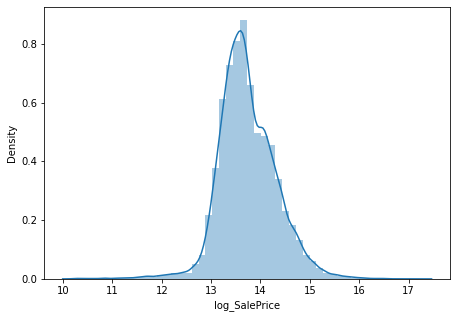

In [213]:
y_log = np.log(df['price'])
y_log.name = "log_SalePrice"
y_log

x_log = np.log(df['sqft_lot'])
x_log.name = "log_sqft_lot"

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(y_log)

/Users/chuck/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sqft_lot', ylabel='Density'>

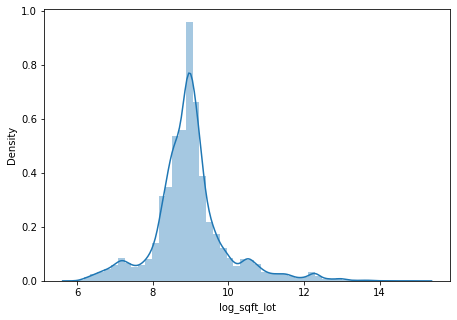

In [215]:
x_log = np.log(df['sqft_lot'])
x_log.name = "log_sqft_lot"

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(x_log)

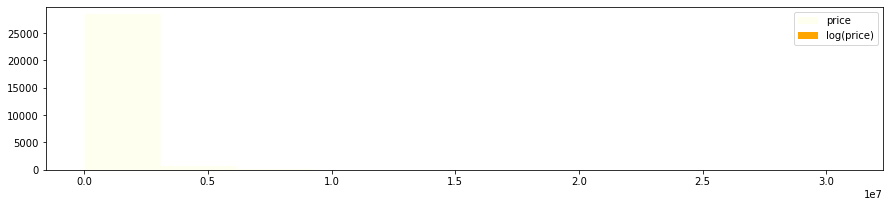

In [214]:
fig, ax = plt.subplots(figsize=(15,3))
ax.hist(y, label="price", color="ivory")
ax.hist(y_log, color="orange", label="log(price)")
ax.legend();

Cant even see the log scaled distribution.  

In [136]:
# df.select_dtypes('number')

In [216]:
y_log_model = sm.OLS(y_log, sm.add_constant(x_sqft_log))
y_log_results = y_log_model.fit()

print(y_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     2681.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:35:20   Log-Likelihood:                -13723.
No. Observations:               29200   AIC:                         2.748e+04
Df Residuals:                   29185   BIC:                         2.760e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -46.7549      2.661    -17.572

In [138]:
mean_absolute_error(y_log, sqft_log_results.predict(sm.add_constant(x_sqft_log)))

1113964.7732847095

In [139]:
mean_squared_error(y_log, sqft_log_results.predict(sm.add_constant(x_sqft_log)), squared=False)

1275464.7211232516

Its very interesting.  The 

In [ ]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='bathrooms', y='price', ax=ax1)
df.plot.scatter(x='bedrooms', y='price', ax=ax2)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['bedrooms'])
plt.subplot(1,2,2)
sns.distplot(df['bathrooms'])

In [ ]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_lot', y='price', ax=ax1)
df.plot.scatter(x='floors', y='price', ax=ax2)

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_lot'])
plt.subplot(1,2,2)
sns.distplot(df['floors'])

## Continuous numerice predictors

In [ ]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_above', y='price', ax=ax1)
df.plot.scatter(x='sqft_garage', y='price', ax=ax2)

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_above'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_garage'])

In [ ]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='yr_built', y='price', ax=ax1)
df.plot.scatter(x='yr_renovated', y='price', ax=ax2)

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['yr_built'])
plt.subplot(1,2,2)
sns.distplot(df['yr_renovated'])

In [ ]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_basement', y='price', ax=ax1)
df.plot.scatter(x='sqft_patio', y='price', ax=ax2)

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_patio'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_basement'])

## Log 

In [ ]:
# X_log = df['sqft_lot']

# fig, ax = plt.subplots(ncols=2, figsize=(8,10))

# ax = ax
# left_ax.scatter(, y, alpha=0.5)
# left_ax.set_xlabel("sqft_lot")
# left_ax.set_ylabel("price")
    
# # Plot log transformed version
# right_ax = ax
# right_ax.scatter(np.log(X_log), np.log(y), alpha=0.5)
# right_ax.set_xlabel("log sqft_lot")
# right_ax.set_ylabel("log price")
    
# fig.suptitle("Raw vs. Log Transformed")

# fig.tight_layout()

In [ ]:
X_log = X[candidates].copy()

X_log.describe()

In [ ]:
for column in X_log.columns:
    X_log[f"log_{column}"] = np.log(X_log[column])
    X_log.drop(column, axis=1, inplace=True)
    
X_log

In [ ]:
y_log = np.log(y)
y_log.name = "log_SalePrice"
y_log

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(y_log)

In [ ]:
model_1 = sm.OLS(y_log, sm.add_constant(X_log))
results2 = model_1.fit()
results2.summary()

In [ ]:
cats2 = ['waterfront', 'view', 'grade', 'condition']
fig, axes = plt.subplots(ncols=len(cats2), figsize=(12,5))
for index, feature in enumerate(cats2):
    df.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
        y='price', ax=axes[index])


There is some real symetry in the grade category.  As the grade increases, it appears that the average price of homes increases as well.  Good views and waterfront properties also seem correlated positively with price, which is understandable.  

In [ ]:
# cats3 = ['nuisance', 'sewer_system', 'greenbelt']
# fig, axes = plt.subplots(ncols=len(cats3), figsize=(12,5))
# for index, feature in enumerate(cats3):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=axes[index])

Not much can be gleaned from these bar charts.  

In [ ]:
# plt.scatter(df1.sewer_system, df1.price)

In [ ]:
# plt.scatter(df1.greenbelt, df1.price)

In [ ]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='condition', y='price', ax=ax1)
# df1.sort_values(by='price', ascending=False).plot.scatter(x='view', y='price', ax=ax2)

In [ ]:
# fig, (ax) = plt.subplots (ncols=1, figsize = (15, 10))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='grade', y='price', ax=ax)

## Attempts at some partial models.  

In [ ]:
# y = df1.price
# X_iter = df1[['sqft_living', 'waterfront', 'grade']]

In [ ]:
# X_iter = pd.get_dummies(X_iter, columns=['grade', 'waterfront'], drop_first=True)

In [ ]:
# model = sm.OLS(y, sm.add_constant(X_iter))
# results = model.fit()
# print(results.summary())

In [ ]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter)))
# mae

The explained variance is higher, but the MAE is worse than our baseline model.  This model is now off by about $359,121.21 for any given prediction.  We will need to adjust the model.  We will attempt some partial regressions below to see what stands out.   

## Partial regression of Grade, sqft_living, and waterfront

In [ ]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter.columns),
#     grid=(2,7),
#     fig=fig)
# plt.tight_layout()
# plt.show()

## Model and partial of Sqft Living, Waterfront, and View

In [ ]:
# y = df1.price
# X_iter2 = df1[['sqft_living', 'waterfront', 'view']]

In [ ]:
# X_iter2 = pd.get_dummies(X_iter2, columns=['view', 'waterfront'], drop_first=True)

In [ ]:
# model = sm.OLS(y, sm.add_constant(X_iter2))
# results = model.fit()
# print(results.summary())

In [ ]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter2)))
# mae

In [ ]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter2.columns),
#     grid=(2,7),
#     fig=fig)
# plt.tight_layout()
# plt.show()

While I feel strongly about sqft living, I am beginning to think view does not have much impact on price as we predicted.  Perhaps the relationship can be better explained by a term or some transformation.  

# Neighborhood

In [ ]:
# Neigh = ['Neighborhood']
# fig, ax = plt.subplots(ncols=len(Neigh), figsize=(12,5))
# for index, feature in enumerate(Neigh):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=ax)


In [ ]:
# y = df1.price
# X_iter_Neigh = df1[['Neighborhood', 'sqft_living', 'waterfront']]
# X_iter_Neigh = pd.get_dummies(X_iter_Neigh, columns=['Neighborhood', 'waterfront'], drop_first=True)

In [ ]:
# model = sm.OLS(y, sm.add_constant(X_iter_Neigh))
# results = model.fit()
# print(results.summary())

In [ ]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter_Neigh)))
# mae

Neighborhood really seems to explain a great deal about the variance in price, and it reduced our MAE down from our baseline.  Our predictions are now around $313,516.77 off by any given predictor.    

In [ ]:
# X_iter_Neigh

In [ ]:
# fig = plt.figure(figsize=(275,475))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter_Neigh.columns),
#     grid=(16,16),
#     fig=fig)
# plt.tight_layout()
# plt.show()

In [ ]:
# # running our model with dummified predictors
# X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
#                        'sewer_system_PUBLIC RESTRICTED', 'yr_built', 'sqft_above', 'bathrooms',
#                       'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
#                       'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
#                       'Neighborhood_Baring' ], axis=1)
# y=dum_df1.price

# model_1 = sm.OLS(y, sm.add_constant(X1))
# results1 = model_1.fit()
# results1.summary()

In [ ]:
# baseline_mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
# # baseline_mae

In [ ]:
# dum_df1 = pd.get_dummies(data=df1, columns=cat_cols, drop_first=True)

In [ ]:
# dum_df1.columns

Drop columns not correlated.  per gp 9-19.  

In [ ]:
# plt.hist(df1.price)

In [ ]:
# sns.distplot(df1.price, bins=30, kde=True)

## Cleaning data

applying a function to remove outliers outside 3 standard deviations

## Bedrooms

In [ ]:
# here we remove outliers by adding them to the highest, most relevant category, thus preserving data.  
df1.bathrooms.value_counts()

In [ ]:
df1.describe()

In [ ]:
# df1.loc[(df1['bedrooms'] > 6) & (df1['bathrooms'] > 6)]

In [ ]:
df1.bathrooms.value_counts()

Anything with zero bathrooms is suspect. 

In [ ]:
# df1.loc[df1['bathrooms'] < 1] = 1
# df1.loc[df1['bathrooms'] > 6] = 6

In [ ]:
# def change_value(condition): 
#     new_living = df1.sqft_living = np.sum(df1.sqft_living, (df1.sqft_garage*.75))
#     new_garage = df1.sqft_garage = np.subtract(df1.sqft_garage, (df1.sqft_garage*.75))
#     if condition == df1.loc[df1['sqft_garage'] > ['sqft_living']]:
#         return new_living, new_garage

In [ ]:
# df1.sqft_garage.apply(change_value)

In [ ]:
# X_iter

In [ ]:
# iter_model = sm.OLS(y, sm.add_constant(X_iter))
# iter_results = iter_model.fit()
# print(iter_results.summary())

In [ ]:
# iter_mae = mean_absolute_error(y, iter_results.predict(sm.add_constant(X_iter)))
# iter_mae

Our iterated model explains about 53 percent of the variance in `price` using `sqft_living` and `Neighborhood`. There  Overall this model is statistically significant, explaining about 38 percent of the variance in price.

In [ ]:
# fig = plt.figure(figsize=(30,220))
# sm.graphics.plot_partregress_grid(
#     iter_results, 
#     exog_idx=list(X_iter.columns),
#     grid=(14,15),
#     fig=fig)
# plt.tight_layout()
# plt.show()

In [ ]:
sns.heatmap(X.corr())

ccpr function partial 

In [ ]:
# df1['Neighborhood'].value_counts()

In [ ]:
# sns.heatmap(X.corr())

Took the above code from https://www.datasklr.com/ols-least-squares-regression/variable-selection. 

MAE dropped significantly.  

## TEST without cleaning after baseline

There are three sets of variables that are highly correlated: yr_old and yr_built, sqft_above
and sqft_living, and bathrooms with sqft_living

### Final Model

# section_3

In [ ]:
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring', 'grade_2 Substandard', 'Neighborhood_Enumclaw', 'heat_source_Electricity/Solar'], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

In [ ]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

 [section_1](#section_1)


[section_2](#section_2)

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## terms and transformations

Attempted to use GeoPandas and plotly. 

## Conclusion